# Ricerca di minimi e massimi di funzioni

### Rights & Credits
Questo notebook è stato realizzato da Agostino Migliore.

## 1 Introduzione
In qesta lezione ci proponiamo di studiare alcuni metodi per la ricerca di punti di <span style="color:blue">minimo</span> (<span style="color:blue">min</span>) e <span style="color:blue">massimo</span> (<span style="color:blue">min</span>) di funzioni, complessivamente chiamati punti di <span style="color:blue">estremo</span>.  
Inizieremo col vedere i criteri per identificare min e max a partire dai valori delle derivate; poi accenneremo a qualche metodo per la ricerca di min e max, vedendo la semplice implementazione con Python di uno di essi; e infine useremo funzioni di <span style="color:blue">SciPy</span> per effettuare la ricerca di punti di estremo locale e globale di una funzione.

## 2 Identificazione di min e max con derivate

### 2.1 Definizione di min e max
Si dice che una funzione a valori reali $f$ con dominio $D$, cioè $f: D \rightarrow \mathbb{R}$, ha un <span style="color:blue">min globale</span>, o <span style="color:blue">min assoluto</span>, in un punto $x_0 \in D$ se
$$
f(x_0) \le f(x) \;\;\;\;\;\; \forall x \in D \tag{1}
$$
Analogamente, si dice che $x_0$ è un punto di <span style="color:blue">max globale</span> o <span style="color:blue">max assoluto</span> per $f(x)$ se
$$
f(x_0) \ge f(x) \;\;\;\;\;\; \forall x \in D \tag{2}
$$
Si noti che i min e max globali possono anche verificarsi agli estremi del dominio della funzione. Per esempio, è così per il max globale della funzione rappresentata in basso a destra nel dominio considerato.  
Diciamo che $x_0$ è un <span style="color:blue">punto di accumulazione</span> in $D$ se in ogni intorno di $x_0$ esiste almeno un altro elemento (punto) $x \in D$ diverso da $x_0$. In pratica, per la maggior parte dei casi e in particolare per quello rappresentato sotto, ciò significa che la funzione è definita con continuità nei dintorni di $x$.  
Un punto di accumulazione $x_0$ è un punto di <span style="color:blue">min locale</span> per la funzione se vale la (1) in un intorno di $x_0$, cioè, in termini matematici, se esiste un $\epsilon > 0$ tale che $\forall x$ con $|x - x_0| < \epsilon$ valga la (1). Una definizione dello stesso tipo vale per il <span style="color:blue">max locale</span> con riferimento alla (2).

|   |   |
|---|---|
|<pass/> <div style="width: 260px">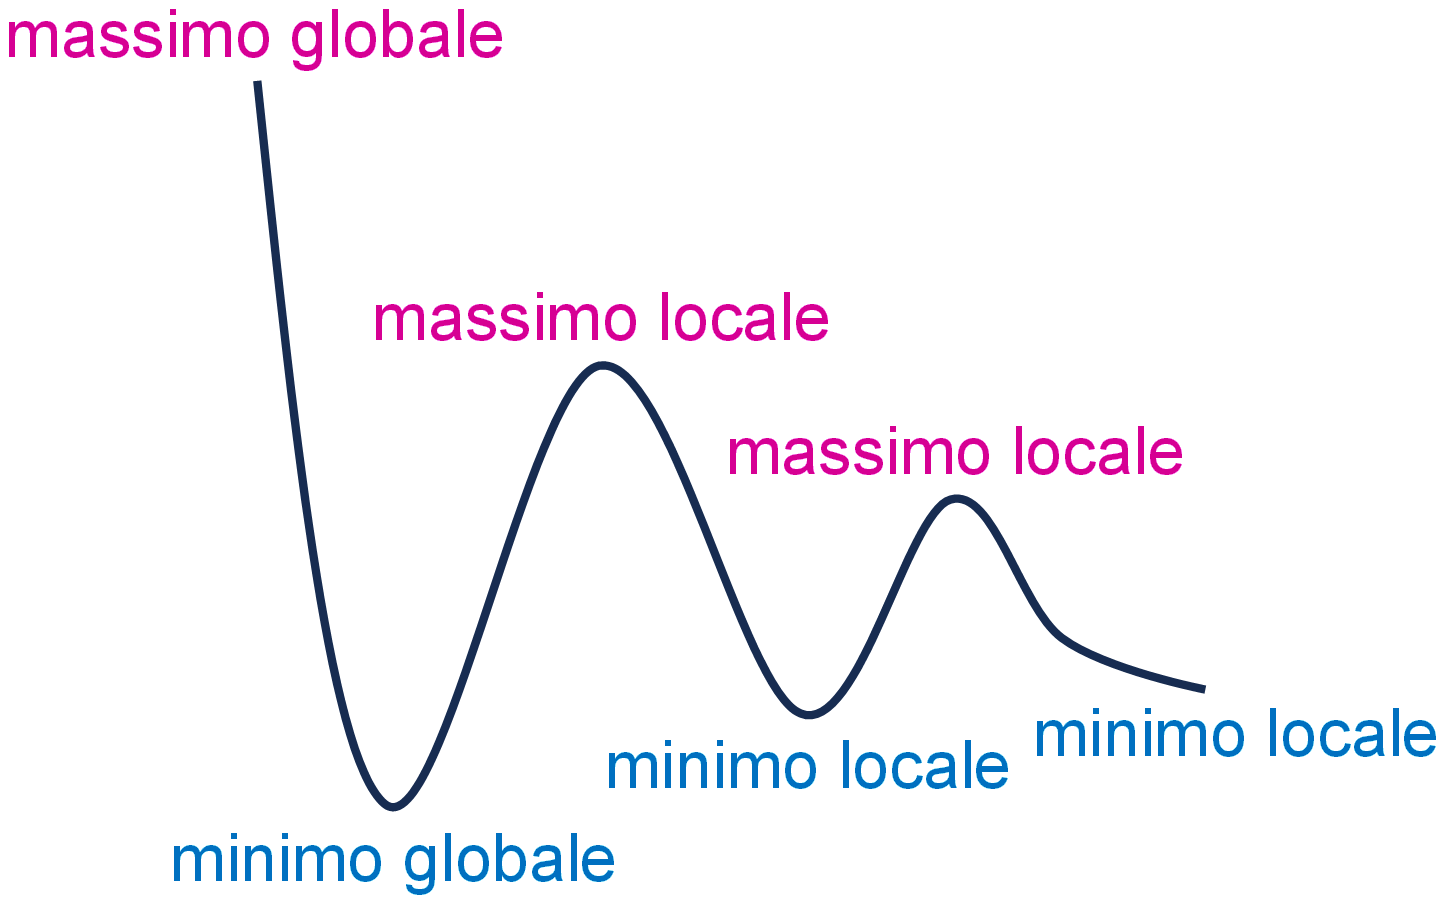</div> | <pass/> <div style="width: 260px">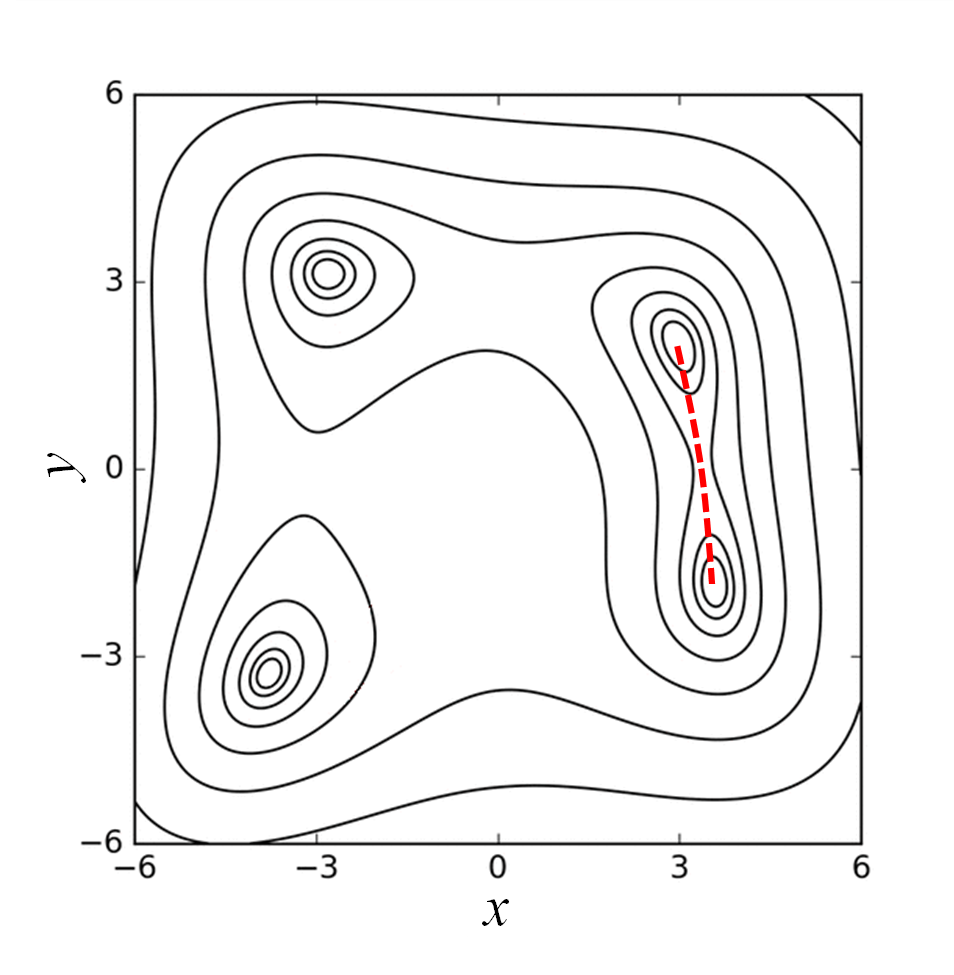</div>|
<font size="1">Figura a destra adattata da https://commons.wikimedia.org/wiki/File:Nelder-Mead_Himmelblau.gif.</font>

### 2.1 Uso delle derivate per trovare min e max

Considerata una funzione sufficientemente regolare nel dominio di interesse (in tutta la trattazione seguente, la funzione sarà considerata continua almeno fino alle derivate del secondo ordine, cioè sarà una funzione almeno di <span style="color:blue">classe C2</span>), un punto di min o max locale $x_0$ interno al dominio è anche un <span style="color:blue">punto stazionario</span>, cioè un punto in cui
$$
\frac{df(x)}{dx}\bigg|_{x=x_0} = 0. \tag{3}
$$
e quindi, localmente, la rapidità di variazione della funzione si riduce a zero. Ciò si vede facilmente dalla figura sopra a sinistra considerando il significato geometrico della derivata, cioè la tangente al grafico nel punto considerato. Chiaramente, non tutti i punti stazionari sono punti di min o max. Essi includono anche i punti di <span style="color:blue">flesso orizzontale</span>, in cui la derivata si annulla e poi continua a variare con lo stesso segno che aveva prima. Questo è, per esempio, il caso di quantità che caratterizzano alcune reazioni chimiche composite che avvengono a step successivi ben distinuguibili sulla scala termporale. In conclusione, <span style="color:darkcyan">la stazionarietà espressa dall'equazione (3) è una condizione necessaria ma non sufficiente per stabilire l'esistenza di un punto di min o max per la funzione</span>. Dobbiamo quindi considerare le derivate successive per asserire la natura del punto di stazionarietà.

Dalla figura vediamo che la pendenza della curva, quindi $f'(x)$, è negativa ma va aumentando (in quanto il suo modulo va diminuendo) prima del punto di min e continua ad aumentare dopo il punto di min (essendo positiva). Il fatto che la funzione derivata, $f'(x)$, aumenta nei dintorni del punto di min significa che la derivata di tale funzione, cioè $f''(x)$, è positiva. Concludiamo quindi che
$$
\begin{cases}
\dfrac{df(x)}{dx}\bigg|_{x=x_0} = 0 \\[5pt]
\dfrac{d^2f(x)}{{dx}^2}\bigg|_{x=x_0} > 0
\end{cases} \; \rightarrow \;\;\; x_0  \; \text{è un punto di min} \tag{4}
$$
In modo analogo si vede che
$$
\begin{cases}
\dfrac{df(x)}{dx}\bigg|_{x=x_0} = 0 \\[5pt]
\dfrac{d^2f(x)}{{dx}^2}\bigg|_{x=x_0} < 0
\end{cases} \; \rightarrow \;\;\; x_0  \; \text{è un punto di max} \tag{5}
$$
Il comportamento della funzione va esplorato ulteiormente se la sua derivata seconda si annulla pure a $x_0$. Ciò può essere anche fatto, semplicemente, considerando i valori della derivata prima negli intorni destro e sinistro del punto, ripercorrendo quindi il ragionamento fatto per giungere alle (4) e (5) in termini della derivata prima stessa (<u>test della derivata prima<u>).

Nel caso di una funzione di due variabili (che useremo come l'esempio più semplice di funzione di più variabili in questa analisi), si può descrivere la funzione geometricamente come una superficie. I suoi valori sono rappresentati lungo l'asse $z$, cioè $z = f(x,y)$, e il suo domonio costituisce, in genere, un sottoinsieme del piano $x,y$. In questo caso si possono anche avere <span style="color:blue">punti di sella</span>, in cui la funzione ha un minimo in una direzione e un massimo in una direzione ortogonale. Un esempio è mostrato sotto e un altro è rappresentato dal punto circa al centro della curva tratteggiata rossa nel grafico di contorno (*contour plot*) mostrato in alto a destra.

<pass/> <div style="width: 400px">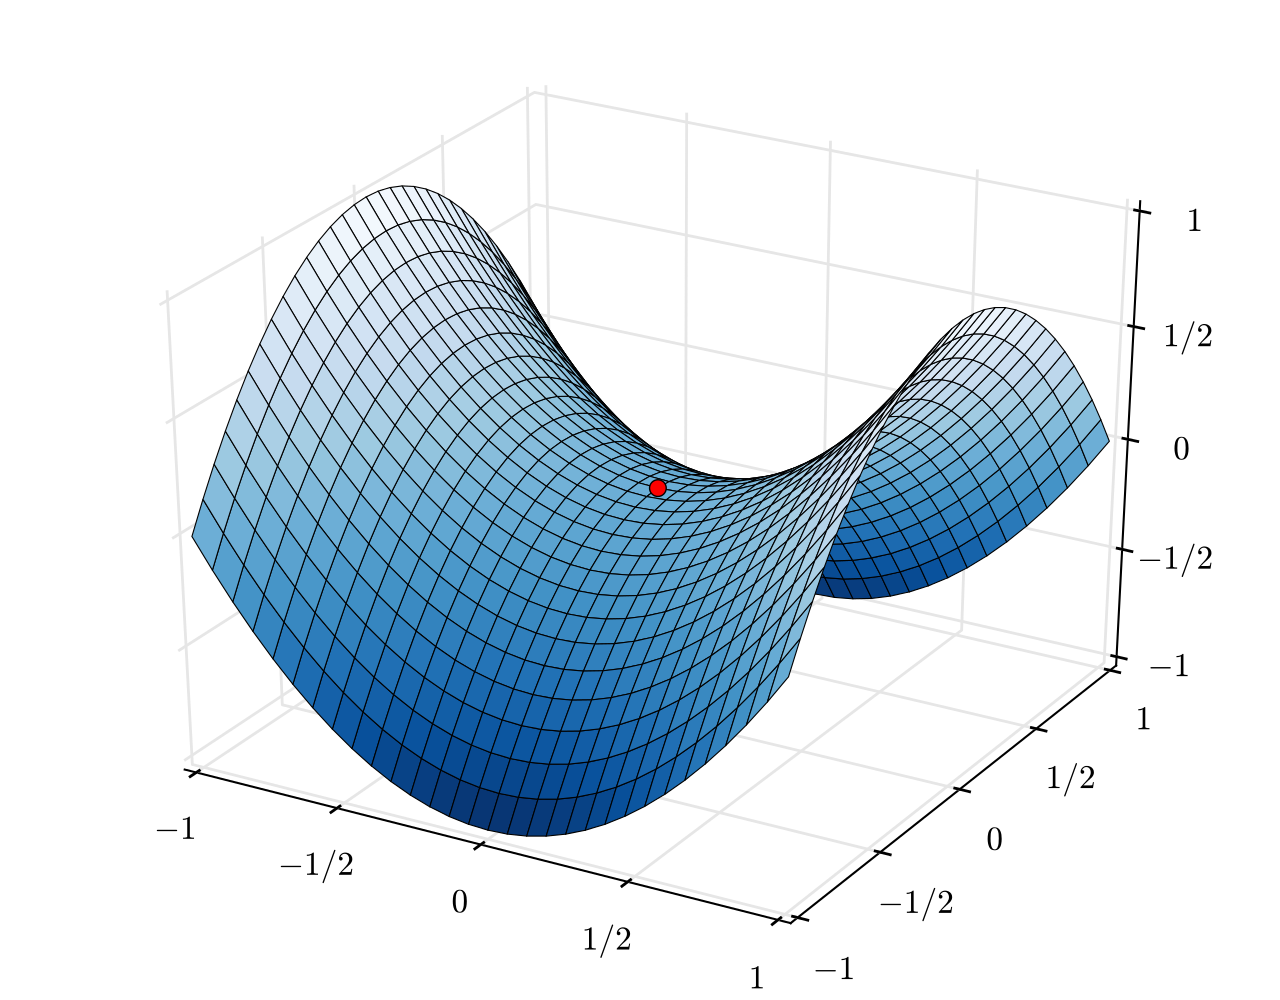</div>
<font size="1">Immagine tratta da https://it.wikipedia.org/wiki/Punto_di_sella#/media/File:Saddle_point.svg</font>.

Per caratterizzare i punti di min e max abbiamo adesso bisogno di più derivate parziali e dobbiamo riconsiderare la serie di Taylor troncata al secondo ordine mostrata nell'equazione (17) della lezione precedente. A tal fine, notiamo che i termini quadratici si possono scrivere come il seguente prodotto matriciale:
$$
 \begin{align}
 & \frac{1}{2} \begin{pmatrix} {\Delta x} & {\Delta y} \end{pmatrix} 
 \begin{pmatrix}
 \dfrac{\partial^2 f}{{\partial x}^2} & \dfrac{\partial^2 f}{\partial x\partial y} \\ 
 \dfrac{\partial^2 f}{\partial y\partial x} & \dfrac{\partial^2 f}{{\partial y}^2} 
 \end{pmatrix} \begin{pmatrix} {\Delta x} \\ {\Delta y} \end{pmatrix} \notag \\[8pt]
 &= \frac{1}{2} \begin{pmatrix} {\Delta x} & {\Delta y} \end{pmatrix} 
 \begin{pmatrix}
 {\Delta x}\dfrac{\partial^2 f}{{\partial x}^2} + {\Delta y}\dfrac{\partial^2 f}{\partial x\partial y} \\ 
 {\Delta x}\dfrac{\partial^2 f}{\partial y\partial x} + {\Delta y}\dfrac{\partial^2 f}{{\partial y}^2}
 \end{pmatrix} \notag \\[8pt] &= \frac{1}{2} \left({\Delta x}^2\frac{\partial^2 f}{{\partial x}^2} + 
 2{\Delta x}{\Delta y}\frac{\partial^2 f}{\partial x\partial y} + {\Delta y}^2\frac{\partial^2 f}{{\partial y}^2}\right) \notag
 \end{align} \tag{6}
$$
con le derivate parziali calcolate nel punto di espansione. La matrice $2 \times 2$ che compare nella (6) si chiama <span style="color:blue">matrice Hessiana</span>:
$$
 \textbf{H} = \begin{pmatrix} \dfrac{\partial^2 f}{{\partial x}^2} & \dfrac{\partial^2 f}{\partial x\partial y} \\
 \dfrac{\partial^2 f}{\partial y\partial x} & \dfrac{\partial^2 f}{{\partial y}^2} \end{pmatrix}  \tag{7}
$$
Dato il vettore posizione attorno al quale si effettua lo sviluppo in serie di Taylor nella forma di vettore colonna
$$
\textbf{r}_0 = \begin{pmatrix} x_0 \\ y_0 \end{pmatrix}  \tag{8}
$$
il vettore spostamento
$$
 \Delta\textbf{r} = \begin{pmatrix} {\Delta x} \\ {\Delta y} \end{pmatrix} \tag{9}
$$
e il gradiente nello spazio bidimensionale nella forma di vettore riga
$$
 \nabla{f} = \begin{pmatrix} \dfrac{\partial f}{\partial x} & \dfrac{\partial f}{\partial y} \end{pmatrix} \tag{10}
$$
lo sviluppo di Taylor al secondo ordine si può scrivere nella forma compatta (trascurando la notazione di uguaglianza approssimata per uno spostamento sufficientemente piccolo)
$$
 f(\textbf{r}_0 + \Delta\textbf{r}) = f(\textbf{r}_0) + \nabla{f}(\textbf{r}_0) \cdot \Delta\textbf{r} + 
 \frac{1}{2} {\Delta\textbf{r}}^T \textbf{H}(\textbf{r}_0) {\Delta\textbf{r}} \tag{11}
$$
che useremo per la seguente discussione. In tale equazione ${\Delta\textbf{r}}^T$ rappresenta il vettore trasposto di ${\Delta\textbf{r}}$, cioè un vettore riga. L'espressione ${\Delta\textbf{r}}^T \textbf{H}(\textbf{r}_0) {\Delta\textbf{r}}$ si chiama una <span style="color:blue">forma quadratica</span>.
Considerando la (11) per uno spostamento sufficientemente piccolo, ci si può fermare al primo ordine dello sviluppo e si può dimostrare che una <span style="color:darkcyan">condizione necessaria perché $\textbf{r}_0$ sia un punto di min o max locale è</span>
$$
 \nabla{f}(\textbf{r}_0) = 0 \tag{12}
$$
che è l'estensione della condizione (3) al caso bidimensionale. Quando questa condizione è soddisfatta, la (11) diventa
$$
 f(\textbf{r}_0 + \Delta\textbf{r}) = f(\textbf{r}_0) + \frac{1}{2} {\Delta\textbf{r}}^T \textbf{H}(\textbf{r}_0) \Delta\textbf{r} \tag{13}
$$
da cui è chiaro che, una volta soddisfatta la condizione (12):

* $f$ ha un min locale in $\textbf{r}_0$ se la forma quadratica ${\Delta\textbf{r}}^T \textbf{H}(\textbf{r}_0) {\Delta\textbf{r}}$ è <span style="color:blue">definita positiva</span>, cioè è maggiore di zero per qualsiasi spostamento $\Delta\textbf{r}$; si dimostra che ciò accade se e solo se tutti gli autovalori della matrice $\textbf{H}(\textbf{r}_0)$ sono positivi. Studierete la nozione di autovalore nella parte di algebra lineare e poi potrete comprendere meglio l'affermazione precedente.

* $f$ ha un max locale in $\textbf{r}_0$ se la forma quadratica ${\Delta\textbf{r}}^T \textbf{H}(\textbf{r}_0) {\Delta\textbf{r}} $ è <span style="color:blue">definita negativa</span>, cioè è minore di zero per qualsiasi spostamento $\Delta\textbf{r}$, il che è vero se e solo se tutti gli autovalori di $\textbf{H}(\textbf{r}_0)$ sono negativi.

* $f$ ha un punto di sella in $\textbf{r}_0$ se gli autovalori di $\textbf{H}(\textbf{r}_0)$ hanno segni diversi.

* Non si conosce la natura del punto se gli autovalori di $\textbf{H}(\textbf{r}_0)$ sono tutti nulli.

In realtà, le condizioni di sopra valgono anche in spazi a più dimensioni. Nel caso bidimensionale trattato qui, chiamato $\Delta\textbf{H}(\textbf{r}_0)$ il determinante della matrice Hessiana, tali condizioni si traducono nelle seguenti forme che, di per sé, non richiedono la conoscenza del concetto di autovalore.

<span style="color:darkcyan">Se è soddisfatta la condizione $\nabla{f}(\textbf{r}_0) = 0$, allora:</span>
1. <span style="color:darkcyan">$f$ ha un min locale in $\textbf{r}_0$ se il primo elemento della matrice Hessiana calcolata in $\textbf{r}_0$ è positivo e $\Delta\textbf{H}(\textbf{r}_0) > 0$,</span>
2. <span style="color:darkcyan">$f$ ha un max locale in $\textbf{r}_0$ se il primo elemento della matrice Hessiana calcolata in $\textbf{r}_0$ è negativo e $\Delta\textbf{H}(\textbf{r}_0) > 0$</span>
3. <span style="color:darkcyan">$f$ ha un punto di sella in $\textbf{r}_0$ se $\Delta\textbf{H}(\textbf{r}_0) < 0$</span>
4. <span style="color:darkcyan">ulteriore analisi è necessaria se $\Delta\textbf{H}(\textbf{r}_0) = 0$.</span>

#### 2.1.1 Esempio
Si consideri la funzione $f(x,y) = x^3 y^2 - 12xy + 8y$

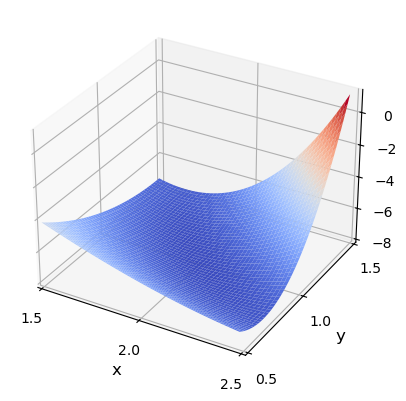

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x = np.arange(1.5, 2.5, 0.02)
y = np.arange(0.5, 1.5, 0.02)
x, y = np.meshgrid(x, y)
z = x**3*y**2 - 12*x*y + 8*y
ax.plot_surface(x, y, z, cmap=cm.coolwarm)
ax.set_xlim(1.5,2.5)
ax.set_xticks(np.arange(1.5, 2.51, 0.5))
ax.set_xlabel('x', fontsize=12)
ax.set_ylim(0.5,1.5)
ax.set_yticks(np.arange(0.5, 1.51, 0.5))
ax.set_ylabel('y', fontsize=12);

<br>
Uguagliamo a zero le derivate parziali prime:
$$
\begin{cases}
 \dfrac{\partial f}{\partial x} = 3x^2 y^2 - 12y = 0 \\[6pt]
 \dfrac{\partial f}{\partial y} = 2x^3 y - 12x + 8 = 0
\end{cases}
$$
Dalla prima  equazione otteniamo $x^2 y = 4$ e, sostituendo nella seconda, $8x - 12x + 8 = 0$ da cui $x = 2$ e quindi $y = 4/x^2 = 1$. Pertanto, $(x_0, y_0) = (2, 1)$.
$$
 \frac{\partial^2 f}{{\partial x}^2} = 6x y^2, \;\; 
 \frac{\partial^2 f}{{\partial x}{\partial y}} = 6x^2 y - 12 , \;\;
 \frac{\partial^2 f}{{\partial y}^2} = 2x^3
$$
Di conseguenza,
$$
\textbf{H}(2, 1) = \begin{pmatrix} 12 & 12 \\ 12 & 16 \end{pmatrix}
$$
Essendo $\Delta\textbf{H}(2,1) = 48$, la condizione 1 di sopra è soddisfatte e quindi $(2, 1)$ è un punto di minimo per la funzione data.

## 3 Metodi per la ricerca di min

In questa sezione vedremo qualche metodo di ottimizzazione per trovare minimi di una funzione di una o più variabili.

### 3.1 Metodo del gradiente

Nell'equazione (11), per uno spostamento sufficientemente piccolo, possiamo trascurare il termine quadratico nello spostamento e scrivere, con buona approssimazione,
$$
 f(\textbf{r}_0 + \Delta\textbf{r}) - f(\textbf{r}_0) = \nabla{f}(\textbf{r}_0) \cdot \Delta\textbf{r} 
 = |\nabla{f}(\textbf{r}_0)| |\Delta\textbf{r}| \cos \theta \tag{14}
$$
dove $\theta$ è l'angolo tra il gradiente e il vettore spostamento. Fissata la lunghezza (il modulo) dello spostamento, il prodotto al secondo membro ha il valore più negativo quando $\Delta\textbf{r}$ è in direzione opposta al gradiente, per cui $\theta = \pi$ e $\cos \theta = -1$. Ora, al primo membro dell'equazione (14) abbiamo la variazione nel valore della funzione in conseguenza di tale spostamento. Si ha, quindi, la massima diminuzione della funzione spostandosi in direzione opposta al gradiente.  
Stabiliamo la seguente procedura per realizzare il <span style="color:blue">metodo del gradiente</span> o <span style="color:blue">metodo di discesa del gradiente</span> (nome originario in inglese: *<span style="color:blue">gradient descent</span>*):
1. Supponiamo di partire da un punto $\textbf{r}$ nel dominio della funzione, in cui la funzione assume un certo valore $f(\textbf{r})$. In un calcolo col computer, tale punto potrà assumere valori discreti e sarà quindi caratterizzato da un indice. Essendo il vettore posizione iniziale, lo chiamiamo $\textbf{s}_0$. Calcoliamo il gradiente della funzione in tale punto. A tal fine, possiamo usare una delle procedure viste nella lezione precedente per calcolare le derivate parziali che intervengono nel gradiente e quindi il gradiente al punto $\textbf{s}_0$, che denotiamo con $\textbf{d}_0$: $\textbf{d}_0 = - \nabla f(\textbf{s}_0)$.
2. Facciamo un primo step di dimensione $a_0$ in direzione opposta al gradiente, per cui il vettore spostamento (cioè la variazione del vettore posizione) sarà ${\Delta\textbf{s}}_0 = -a_n\textbf{d}_0$. Aggiorniamo quindi la posizione a $\textbf{s}_1 = \textbf{s}_0 -a_n\textbf{d}_0$.
3. Reiteriamo lo step 2 finché non si annulla il gradiente; pertanto, in un ciclo del programma avremo istruzioni del tipo

$\;\;\;\;\; \textbf{s}_{k+1} = \textbf{s}_k -a_k\textbf{d}_k$  
$\;\;\;\;\; k = k + 1$  

Procendendo in tal modo otteniamo una sequenze monotona decrescente $f_0 = f(\textbf{s}_0) \ge f_1 \ge f_2 \ge ...$ di valori della funzione che desideriamo converga a un min locale. Se una funzione è convessa (un esempio molto semplice è quello di un paraboloide), allora il min trovato è un min globale.
Il metodo della discesa del gradiente si può applicare a spazi con un qualsiasi numero di dimensioni. Tuttavia, talvolta esso può richiedere molte iterazioni per calcolare un min locale con la richiesta accuratezza. Approcci basati sul metodo di Newton e sul metodo del gradiente coniugato convergono in poche iterazioni, anche se il costo di ciascuna iterazione è maggiore (uno di tali approcci è il <span style="color:blue">metodo BFGS</span> usato tramite una funzione di SciPy in una lezione precedente per trovare il minimo di una funzione). Il <span style="color:blue">metodo del gradiente coniugato</span> è una variante del metodo del gradiente che consente una convergenza più rapida grazie a una scelta diversa della direzione di discesa.

<span style="color:darkmagenta">Breve nota aggiuntiva (opzionale)</span>: La convergenza a un min è garantita quando la funzione ha opportune proprietà (per esempio, quando la funzione è convessa e soddisfa la cosiddetta condizione di Lipschitz, che limita la variazione di una funzione) e si scelgono opportunamente i valori di $a_i$ (per esempio, la sequenza di valori di $a_i$ nel metodo di Barzilai-Borwein o una sequenza che soddisfi le cosiddette condizioni di Wolfe). Si noti pure che il metodo della discesa del gradiente può essere visto come un'applicazione del metodo di Eulero per la risoluzione dell'equazione differenziale ordinaria $x'(t) = -\nabla f(t,x(t))$.

### 3.2 Metodo Di Newton

Il <span style="color:blue">metodo di Newton</span> è stato originariamente concepito per il problema generale di <span style="color:darkcyan">trovare le radici di un'equazione</span>
$$
f(x) = 0 \tag{15}
$$
dove $f(x)$ può essere una funzione reale o complessa e deve essere derivabile. Ovviamente, si parte dalla non conoscenza della/e soluzione/i di tale equazione, quindi da un punto $x_0$ in cui $f(x_0) \ne 0$. Lo sviluppo di Taylor al primo ordine di tale funzione dà
$$
f(x) \equiv f(x_0 + \Delta x) = f(x_0) + f'(x_0)\Delta x \equiv f(x_0) + f'(x_0)(x-x_0) \tag{16}
$$
Se lo spostamento $\Delta x$ ci portasse direttamente al punto giusto, cioè a una soluzione dell'equazione (15), allora sarebbe $f(x) = 0$. Possiamo considerare, quindi, la soluzione dell'equazione
$$
f(x_0) + f'(x_0)(x-x_0) = 0 \tag{17}
$$
cioè
$$
x = x_0 - \frac{f(x_0)}{f'(x_0)} \tag{18}
$$
come un valore aggiornato migliore di $x_0$ per pervenire alla soluzione cercata. In termini di programma, con una delle consuete notazioni abbreviate $f^{(n)}_k = f^{(n)}[k] = f^{(n)}(x_k)$ per la funzione e le sue derivate calcolate in posizioni discrete (o, per esempio, a tempi discreti se si tratta di una funzione del tempo), dobbiamo effettuare l'iterazione
$$
x_{k+1} = x_{k} -\frac{f_k}{f'_k}, \;\;\;\;\; k = 0,1,2,... \tag{19}
$$
La (19) è meglio nota come l'<span style="color:blue">iterazione di Newton-Raphson</span> ed è stata estesa da Simpson a una funzione vettoriale di più variabili della forma
$$
\textbf{f}(\textbf{x}) = \left(f_1(\textbf{x}),f_2(\textbf{x}),...,f_n(\textbf{x})\right) = (0,0,...,0) \equiv \textbf{0} \tag{20}
$$
dove $\textbf{x} = (x_1, x_2, ..., x_n)$. In tal caso la (19) diventa
$$
\textbf{x}_{k+1} = \textbf{x}_{k} -{J^{-1}_k}\textbf{f}_k, \;\;\;\;\; k = 0,1,2,... \tag{21}
$$
dove $J_k \equiv J(\textbf{x}_k)$ è la  <span style="color:blue">matrice Jacobiana</span>
$$
 J(x_1,x_2,...,x_n) = \begin{pmatrix}
 \dfrac{\partial f_1}{\partial x_1} & \cdots & \dfrac{\partial f_1}{\partial x_n} \\ 
 \vdots & \ddots & \vdots \\
 \dfrac{\partial f_n}{\partial x_1} & \cdots & \dfrac{\partial f_n}{\partial x_n}
 \end{pmatrix} \tag{22}
$$
calcolata nel punto $\textbf{x}_k$.

A questo punto, torniamo al problema di ricerca dei minimi di $f(x)$ sul suo dominio $D \in \mathbb{R}$. A tal fine, possiamo riformulare il problema di sopra per la derivata $g(x) = f'(x)$, che è anch'essa una funzione. Possiamo riscrivere quanto sopra per $g(x) = f'(x)$ e riottenere le equazioni (18) e (19) con $g$ al posto di $f$, quindi sostituire $g$ con $f'$ per ottenere
$$
x = x_0 - \frac{f'(x_0)}{f''(x_0)} \tag{23}
$$
e la sua versione discreta allo step $0$ e agli step successivi
$$
x_{k+1} = x_{k} -\frac{f'_k}{f''_k}, \;\;\;\;\; k = 0,1,2,... \tag{24}
$$
Alternativamente, si arriva allo stesso risultato procedendo come segue. Si considera lo sviluppo al secondo ordine della funzione.
$$
f(x) = f(x_0) + f'(x_0)(x - x_0) + \frac{1}{2}f''(x_0)(x - x_0)^2 \tag{25}
$$
$x$ deve essere scelta in modo tale da minimizzare la funzione. Se la derivata seconda è positiva (per cui tale approssimazione quadratica rappresenta una funzione convessa nei dintorni di $x_0$), trovare il punto di min di $f$ implica imporre che la funzione, espressa nella forma quadratica approssimata (25), abbia derivata nulla. In altre parole, prendendo la derivata di ambo i lati della (25), imponendo $f'(x) = 0$ e considerando che $f'(x_0)$ è una costante (essendo una funzione valutata in un punto) e quindi la sua derivata rispetto a $x$ è nulla, risulta
$$
0 = f'(x_0) + f''(x_0)(x - x_0) \tag{26}
$$
da cui vien fuori di nuovo la (23).

Nel caso bidimensionale, bisogna applicare il gradiente all'equazione (11), che in realtà conserva la stessa forma quale che sia il numero di dimensioni. Dal momento che $\nabla{f}(\textbf{r}_0)$ non dipende da $\textbf{r}$, si ha
$$
\begin{align}
 \nabla[\nabla{f}(\textbf{r}_0) \cdot \Delta\textbf{r}] &= \left(\hat{\textbf{x}}\frac{\partial}{\partial x} + 
 \hat{\textbf{y}}\frac{\partial}{\partial y}\right) 
 \left[\frac{\partial f}{\partial x}\bigg|_{\textbf{r} = \textbf{r}_0} (x - x_0) + 
 \frac{\partial f}{\partial y}\bigg|_{\textbf{r} = \textbf{r}_0} (y - y_0)\right] \notag \\[6pt] 
 &= \hat{\textbf{x}}\frac{\partial f}{\partial x}\bigg|_{\textbf{r} = \textbf{r}_0} + 
 \hat{\textbf{y}}\frac{\partial f}{\partial y}\bigg|_{\textbf{r} = \textbf{r}_0} = \nabla{f}(\textbf{r}_0) \notag
 \end{align} \tag{27}
$$
La forma quadratica nella (11) ha l'espressione data nell'equazione (6), con le derivate calcolate nel punto $\textbf{r}_0$. Per semplificare la notazione, scriviamo  $H_{x_1 x_2} = \frac{\partial^2 f}{\partial x_1\partial x_2}\bigg|_{\textbf{r} = \textbf{r}_0}$ dove $(x_1, x_2)$ può essere $(x, x)$, $(x, y)$, $(y, x)$ o $(y, y)$. Possiamo dunque scrivere
$$
\begin{align}
 \nabla\left[\frac{1}{2} {\Delta\textbf{r}}^T \textbf{H}(\textbf{r}_0) \Delta\textbf{r}\right] 
 &= \nabla\left(\frac{1}{2}H_{x x}{\Delta x}^2 + H_{x y}{\Delta x}{\Delta y} + \frac{1}{2}H_{y y}{\Delta y}^2\right) \notag \\[6pt] 
 &= (H_{x x}\Delta x + H_{x y}\Delta y)\hat{\textbf{x}} + (H_{y x}\Delta x + H_{y y}\Delta y)\hat{\textbf{y}} \notag
 \end{align} \tag{28}
$$
ovvero, esprimendo il vettore al secondo membro come un vettore colonna,
$$
 \nabla\left[\frac{1}{2} {\Delta\textbf{r}}^T \textbf{H}(\textbf{r}_0) \Delta\textbf{r}\right] 
 = \begin{pmatrix} H_{x x} & H_{x y} \\ H_{y x} & H_{y y} \end{pmatrix} \begin{pmatrix} \Delta x \\ \Delta y \end{pmatrix} 
 = \textbf{H}(\textbf{r}_0)\Delta\textbf{r} \tag{29}
$$
In definitiva, l'applicazione del gradiente alla (11) dà
$$
0 = \nabla{f}(\textbf{r}_0) + \textbf{H}(\textbf{r}_0)\Delta\textbf{r} \tag{30}
$$
dove il termine col gradiente è scritto come vettore colonna. Notiamo che, esplicitando l'espressione del vettore spostamento e ridistribuendo i termini a primo e secondo membro, la (30) si può immediatamente riscrivere nella forma
$$
\textbf{H}(\textbf{r}_0)\textbf{r} = \textbf{H}(\textbf{r}_0)\textbf{r}_0 - \nabla{f}(\textbf{r}_0) \tag{31}
$$
La (31) rappresenta un <span style="color:blue">sistema lineare</span>, scritto in forma vettoriale compatta, della forma
$$
\begin{align}
 & \textbf{A}\textbf{r} = \textbf{b} \\[6pt]
 & \text{con}\;\;\; \textbf{A} = \textbf{H}(\textbf{r}_0),\;\;\; \textbf{b} = \textbf{H}(\textbf{r}_0)\textbf{r}_0 - 
 \nabla{f}(\textbf{r}_0)
 \end{align} \tag{32}
$$
Moltiplicando la (31) a sinistra per l'inversa della matrice Hessiana, si ottiene
$$
\textbf{r} = \textbf{r}_0 - \textbf{H}^{-1}(\textbf{r}_0)\nabla{f}(\textbf{r}_0) \tag{33}
$$
Si può dimostrare facilmente che la relazione (33) vale quale che sia il numero di dimensioni in gioco. Confrontando la (33) con la (23), si vede che la derivata è stata sostituita, come ci si aspetta, da un gradiente e la derivata seconda dalla matrice Hessiana, che contiene tutte le derivate parziali del secondo ordine. Il metodo di Newton è molto rapido, anche se non è garantito che converga a un punto di min in tutti i casi. Come si vede dalla (33), il metodo richiede che la derivata seconda o, in generale, la matrice Hessiana, sia invertibile. La risoluzione del sistema lineare (31), e quindi l'inversione della matrice Hessiana può essere effetuata efficacemente con il <span style="color:blue">metodo del gradiente coniugato</span>.  
L'analogo dell'equazione (24) per funzioni di più variabili è
$$
\textbf{r}_{k+1} = \textbf{r}_k - \textbf{H}^{-1}(\textbf{r}_k)\nabla{f}(\textbf{r}_k), \;\;\;\;\; k = 0,1,2,... \tag{34}
$$

Uno svantaggio del metodo di Newton è la necessità di calcolare le derivate prima e seconda di $f$ o la matrice Hessiana; comunque, ove si usi tale metodo, il calcolo delle derivate necessarie può essere effettuato in modo esatto o discreto.  
Vi sono, chiaramente, altri approcci all'ottimizzazione di una funzione che non trattiamo in questa lezione. Un altro metodo sarà menzionato nella sezione seguente.

## 4 Ricerca di min: esempi

### 4.1 scipy.optimize.minimize_scalar

Prima di tutto, importiamo le funzioni di SciPy e SymPy che ci serviranno e definiamo la funzione d'interesse. Tale funzione è piuttosto complicata e la sua derivata è ancora più complicata (vedi sotto), per cui sarebbe impossibile risolvere analiticamente l'equazione $f'(x) = 0$ e poi procedere con le derivate del secondo ordine per trovare i punti di min. Nel seguito la stessa funzione è scritta in una forma, $f$, appropriata per essere usata dalle funzioni di Scipy e in una forma, $g$, adeguata all'uso di SimPy.

In [1]:
from scipy.optimize import minimize_scalar, basinhopping, minimize
from scipy.misc import derivative
import sympy as smp
from sympy import diff, symbols
x, y, f = symbols('x y f')

def f(x):
    return x**3*np.exp(-x/2)*np.sin(0.5*x)-40*x**2*np.exp(-2*x)*np.cos(0.5*x)-np.arctan(x)/(x**2+3)

g = x**3*smp.exp(-x/2)*smp.sin(0.5*x)-40*x**2*smp.exp(-2*x)*smp.cos(0.5*x)-smp.atan(x)/(x**2+3)
g

x**3*exp(-x/2)*sin(0.5*x) - 40*x**2*exp(-2*x)*cos(0.5*x) - atan(x)/(x**2 + 3)

In [2]:
dg = diff(g,x)
ddg = diff(g,x,x)
dg

-x**3*exp(-x/2)*sin(0.5*x)/2 + 0.5*x**3*exp(-x/2)*cos(0.5*x) + 20.0*x**2*exp(-2*x)*sin(0.5*x) + 80*x**2*exp(-2*x)*cos(0.5*x) + 3*x**2*exp(-x/2)*sin(0.5*x) - 80*x*exp(-2*x)*cos(0.5*x) + 2*x*atan(x)/(x**2 + 3)**2 - 1/((x**2 + 1)*(x**2 + 3))

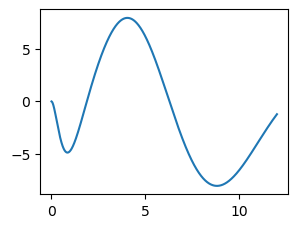

In [3]:
x1 = np.linspace(0,12,10**4)
y1 = f(x1)
plt.figure(figsize=(3.2,2.4))
plt.plot(x1,y1)
plt.show()

Usiamo adesso la funzione <span style="color:red">minimize_scalar</span> del modulo <span style="color:blue">scipy.optimize</span>. <span style="color:darkcyan">Tale funzione consente di effettuare la minimizzazione locale di una funzione scalare di una variabile.</span> Useremo la funzione con i valori assegnati agli argomenti secondo le impostazioni predefinite; pertanto l'unico input necessario sarà la funzione di cui trovare il min locale.

In [4]:
minimize_scalar(f)

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -4.833586647031791
       x: 0.8496631041987057
     nit: 10
    nfev: 13

### 4.2 Metodo di Newton con derivate discrete e continue

Prima di tutto, usiamo il metodo di Newton calcolando le derivate prima e seconda con i metodi discreti più basilari:

In [5]:
def df(x,d):
    return (f(x+d)-f(x))/d

def ddf(x,d):
    return (f(x+d)-2*f(x)+f(x-d))/d**2
    
def min_f():
    x = float(input())
    d = float(input())
    tol = float(input())
    dx = 10*tol
    i = 0
    while dx > tol:
        x1 = x - df(x,d)/ddf(x,d)
        dx = abs(x1-x)
        x = x1
        i += 1
    m = print("Il punto di min è ", x, "il numero di step fatti è ", i)
    return m

In [6]:
min_f()

 0.5
 1e-7
 1.48e-08


Il punto di min è  0.8496630540154352 il numero di step fatti è  6


Abbiamo usato la stessa soglia di tolleranza della funzione di Scipy. Si noti che il risultato è molto accurato ed è stato ottenuto in soli 6 step.  
Ora calcoliamo la derivata con la funzione <span style="color:red">derivative</span> del modulo <span style="color:blue">scipy.misc</span>.

In [7]:
def min_f_bis():
    x = float(input())
    d = float(input())
    tol = float(input())
    dx = 10*tol
    i = 0
    while dx > tol:
        x1 = x - derivative(f,x,d,n=1)/derivative(f,x,d,n=2)
        dx = abs(x1-x)
        x = x1
        i += 1
    m = print("Il punto di min è ", x, "il numero di step fatti è ", i)
    return m

In [8]:
min_f_bis()

 0.5
 1e-7
 1.48e-08


Il punto di min è  0.8496631040005915 il numero di step fatti è  5


C:\Users\Agostino\AppData\Local\Temp\ipykernel_33204\449854612.py:8: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  x1 = x - derivative(f,x,d,n=1)/derivative(f,x,d,n=2)


Vediamo che l'accuratezza è ancora superiore a quella ottenuta con le derivate discrete grezze usate nella funzione di prima e che 5 step sono stati sufficienti per raggiungere l'obiettivo.  
Infine, usiamo SymPy e quindi calcoliamo le derivate in modo esatto sfruttando le espressioni analitiche ottenute prima con tale modulo.

In [9]:
d_g = smp.lambdify(x,dg)
dd_g = smp.lambdify(x,ddg)

def min_f_tris():
    x = float(input())
    tol = float(input())
    dx = 10*tol
    i = 0
    while dx > tol:
        x1 = x - d_g(x)/dd_g(x)
        dx = abs(x1-x)
        x = x1
        i += 1
    m = print("Il punto di min è ", x, "il numero di step fatti è ", i)
    return m

In [10]:
min_f_tris()

 0.5
 1.48e-08


Il punto di min è  0.8496631041277377 il numero di step fatti è  5


Come vedete, il valore è vicinissimo a quello ottenuto con la funzione `minimize_scalar` e 5 step sono stati di nuovo sufficienti.

### 4.3 scipy.optimize.basinhopping

La funzione <span style="color:red">basinhopping</span> del modulo <span style="color:blue">scipy.optimize</span> <span style="color:darkcyan">consente di ottenere il minimo globale di una funzione </span> usando l'<span style="color:blue">algoritmo del salto di bacino</span> (il nome inglese originale è *<span style="color:blue">basin-hopping algorithm</span>*). Esso è anche chiamato <span style="color:blue">un metodo</span>. L'algoritmo, concepito per mimare il processo naturale di minimizzazione dell'energia di raggruppamenti atomici, è considerato uno degli algoritmi più attendibili (e da taluni anche il più attendibile), in chimica fisica, per la ricerca della struttura di più bassa energia di raggruppamenti di atomi e sistemi macromolecolari.  
Il metodo è caratterizzato da due fasi, combinando un algoritmo di salto globale per l'esplorazione di diversi bacini con una minimizzazione locale a ciascun salto. Il meccanismo di salto (*hopping*) tra bacini è conseguito mediante un approccio di tipo Monte Carlo.

I parametri di ingresso non opzionali della funzione `basinhopping` sono la funzione e il punto di partenza. Con la stessa scelta di $x_0$ di prima ($x_0 = 0.5$), vediamo che la funzione non riesce a trovare il minimo globale, rimanendo nel bacino iniziale e trovando lo stesso minimo locale di prima:

In [11]:
basinhopping(f,0.5)

                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: -4.833586647031791
                          x: [ 8.497e-01]
                        nit: 100
      minimization_failures: 0
                       nfev: 1284
                       njev: 642
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: -4.833586647031791
                                    x: [ 8.497e-01]
                                  nit: 4
                                  jac: [ 1.192e-07]
                             hess_inv: [[ 5.914e-02]]
                                 nfev: 12
                                 njev: 6

Usando $x_0 = 4.5$, vediamo che si perviene all'altro minimo locale.

In [12]:
basinhopping(f,4.5)

                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: -7.9798802480396835
                          x: [ 8.806e+00]
                        nit: 100
      minimization_failures: 0
                       nfev: 956
                       njev: 478
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: -7.9798802480396835
                                    x: [ 8.806e+00]
                                  nit: 3
                                  jac: [ 5.960e-08]
                             hess_inv: [[ 3.998e-01]]
                                 nfev: 10
                                 njev: 5

Tuttavia, con $x_0 = 3.5$, la funzione riesce a trovare il minimo assoluto, che non si vede nella figura di sopra ed è mostrato sotto (si noti che la scala dell'asse delle ordinate nella figura di sotto è tale da non far vedere i due minimi locali evidenziati sopra).

In [13]:
basinhopping(f,3.5)

                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: -14358.318512503909
                          x: [-2.777e+00]
                        nit: 100
      minimization_failures: 50
                       nfev: 4085
                       njev: 1884
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: -14358.318512503909
                                    x: [-2.777e+00]
                                  nit: 7
                                  jac: [ 0.000e+00]
                             hess_inv: [[ 9.777e-06]]
                                 nfev: 38
                                 njev: 19

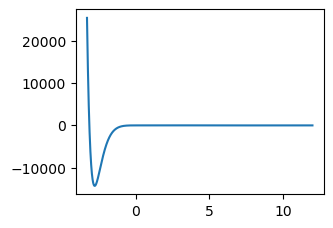

In [14]:
x1 = np.linspace(-3.3,12,10**4)
y1 = f(x1)
plt.figure(figsize=(3.2,2.4))
plt.plot(x1,y1)
plt.show()

In [17]:
for a in (0.5,3.5,4.5):
    b = basinhopping(f,a,stepsize=1.0)
    print(b)

                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: -14358.318512503907
                          x: [-2.777e+00]
                        nit: 100
      minimization_failures: 12
                       nfev: 2058
                       njev: 986
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: -14358.318512503907
                                    x: [-2.777e+00]
                                  nit: 9
                                  jac: [ 0.000e+00]
                             hess_inv: [[ 1.955e-06]]
                                 nfev: 32
                                 njev: 16
                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
     